# House Prices: Advanced Regression Techniques

## Model: ElasticNet Regression (Best Score)

## 1. Getting data with Pandas

In [545]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [546]:
train_data = pd.read_csv('all/train.csv')
test_data  = pd.read_csv('all/test.csv')

In [547]:
train_label = train_data['SalePrice']
train_data_input = train_data.drop('SalePrice',1)
all_data   = pd.concat([train_data_input, test_data], axis=0)

print('Data Shape:\n')
print('Train Data \t\t:', train_data.shape)
print('Train Data(Input)\t:',train_data_input.shape)
print('Test  Data(Input)\t:',test_data.shape)
print('All Data \t\t:',all_data.shape)

Data Shape:

Train Data 		: (1460, 81)
Train Data(Input)	: (1460, 80)
Test  Data(Input)	: (1459, 80)
All Data 		: (2919, 80)


## 2. Data exploration

### 2.1 Data features

In [548]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [549]:
missing_data = all_data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

In [550]:
count        = all_data.isnull().sum().sort_values(ascending=False)
percent_relt = all_data.isnull().sum() / all_data.isnull().count()
percent_relt = percent_relt.sort_values(ascending=False)*100

missing_data_perc  = pd.concat([count, percent_relt], axis=1, keys = ['Count', 'Percent(%)'])
missing_data_perc.head(40)

,Count,Percent(%)
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


### 2.2 Data vs SalePrice

Number of numerical data   :  36


/home/ghost/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


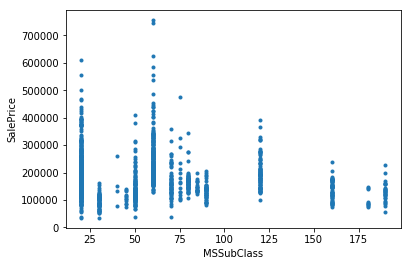

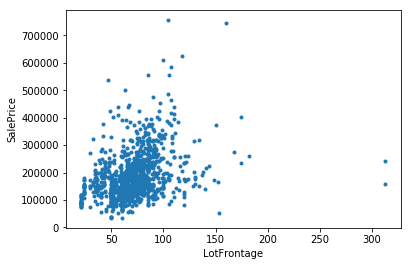

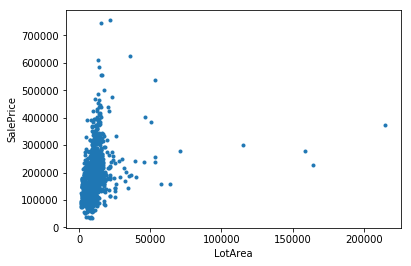

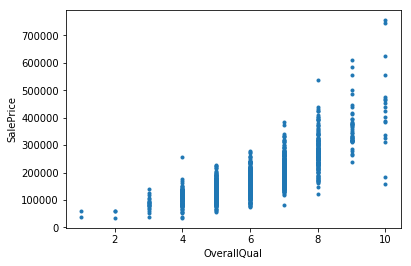

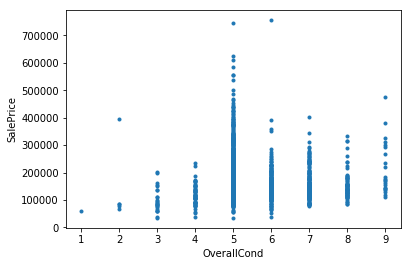

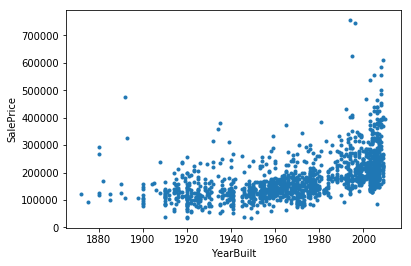

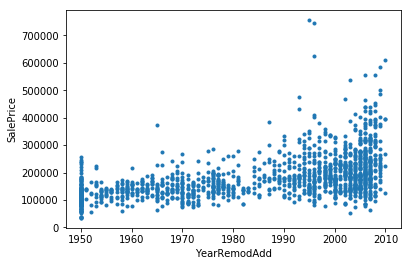

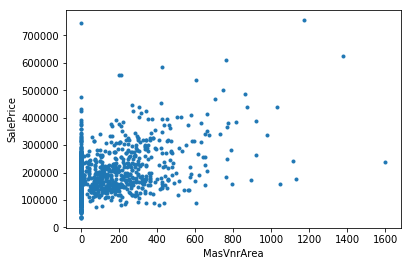

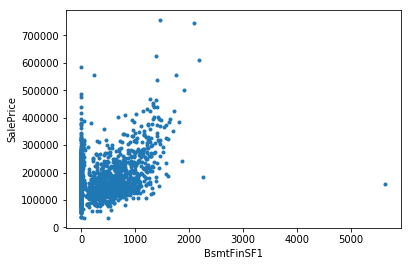

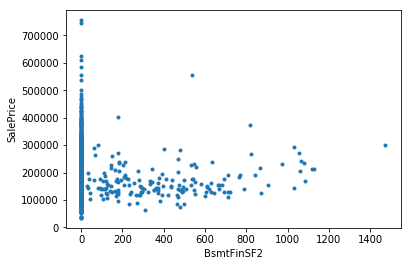

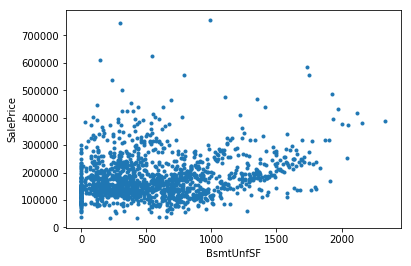

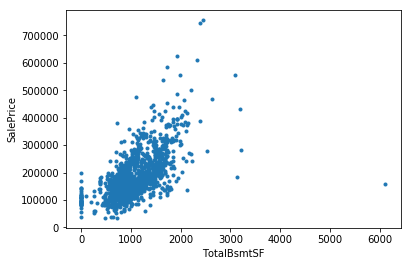

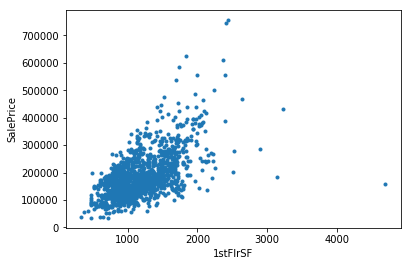

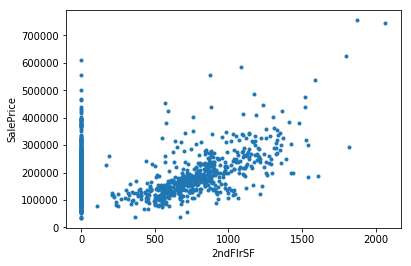

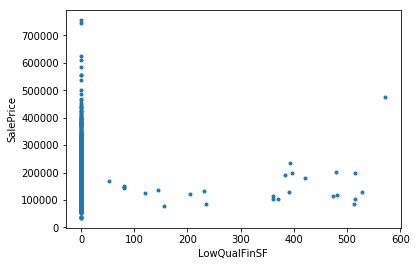

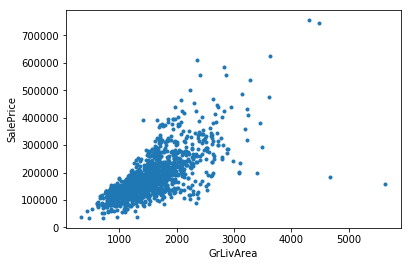

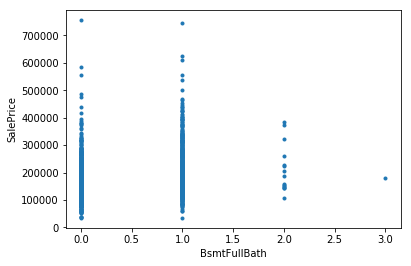

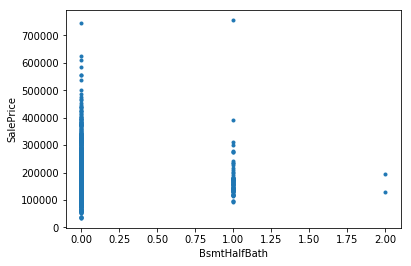

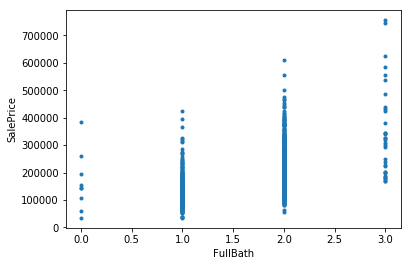

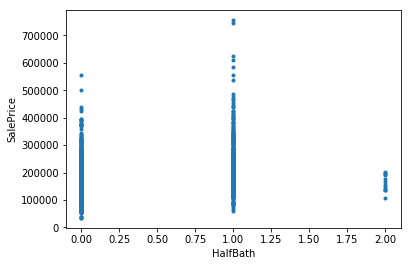

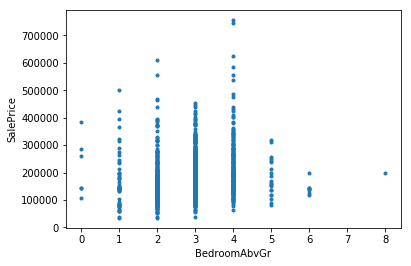

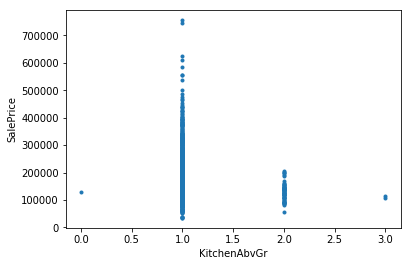

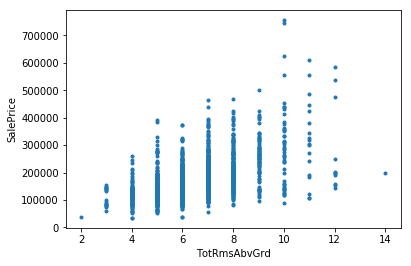

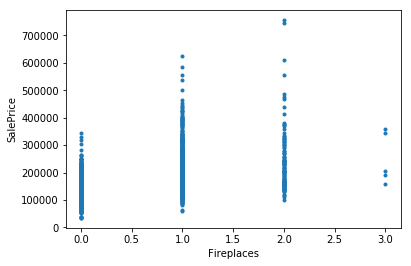

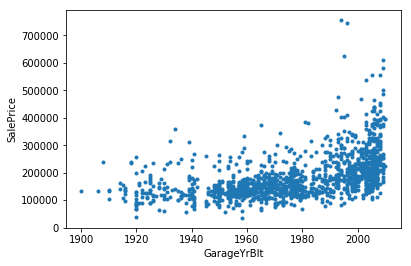

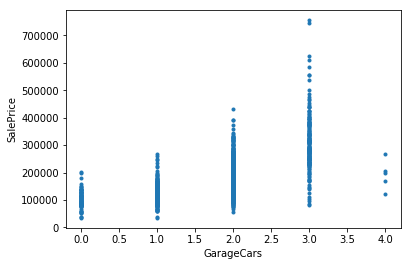

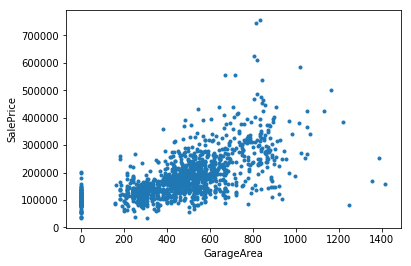

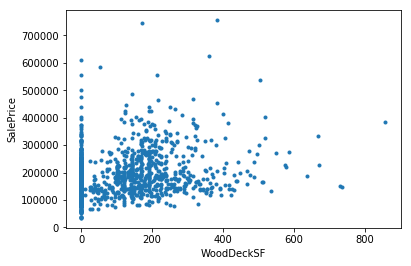

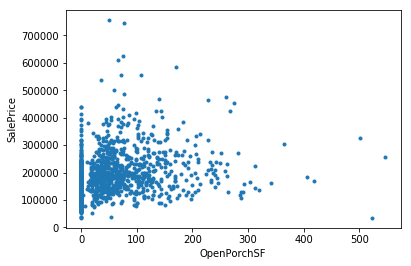

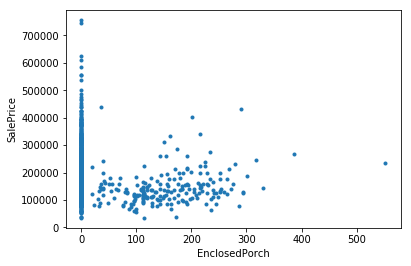

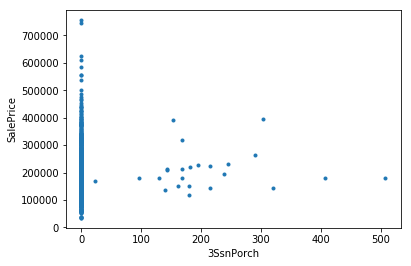

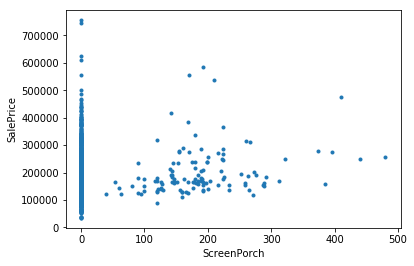

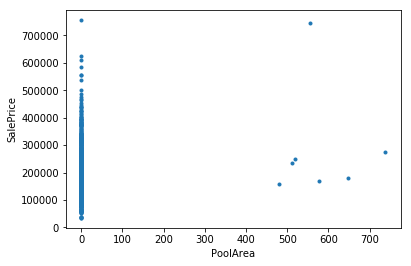

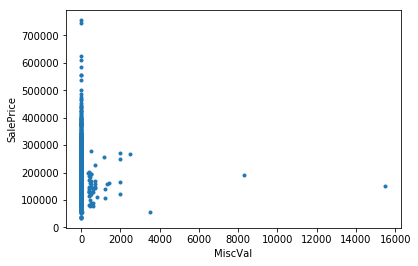

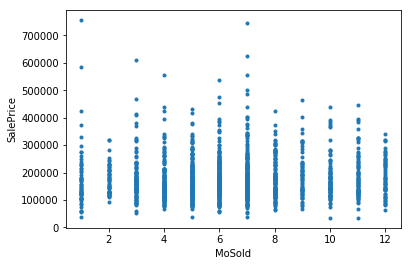

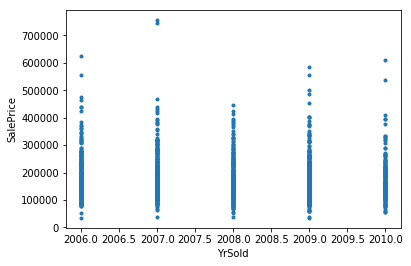

In [551]:
numerical_data    = [var for var in all_data.columns if all_data.dtypes[var] != 'object']

numerical_data.remove('Id')
print('Number of numerical data   : ', len(numerical_data))
for name in numerical_data:
    plt.figure()
    plt.xlabel(name)
    plt.ylabel('SalePrice')
    plt.plot(train_data[name].values, train_data['SalePrice'].values, 'o',markersize=3)

## 3. Prepare data

### 3.1 Drop Missing Data

In [552]:
all_data = all_data.drop((missing_data_perc[missing_data_perc['Percent(%)'] > 25]).index, 1)

In [553]:
all_data = all_data.drop('BsmtFinSF1', 1)
all_data = all_data.drop('BsmtFinSF2', 1)
all_data = all_data.drop('BsmtUnfSF', 1)
all_data = all_data.drop('TotalBsmtSF', 1)
all_data = all_data.drop('GarageArea', 1)
all_data = all_data.drop('WoodDeckSF', 1)
all_data = all_data.drop('OpenPorchSF', 1)
all_data = all_data.drop('EnclosedPorch', 1)
all_data = all_data.drop('3SsnPorch', 1)
all_data = all_data.drop('ScreenPorch', 1)

### 3.2 Fill Missing Data

In [554]:
all_data['LotFrontage']  = all_data['LotFrontage'].fillna(0)
all_data['GarageCond']   = all_data['GarageCond'].fillna('NA')
all_data['GarageType']   = all_data['GarageType'].fillna('NA')
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('NA')
all_data['GarageQual']   = all_data['GarageQual'].fillna('NA')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('NA')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('NA')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('NA')
all_data['BsmtCond']     = all_data['BsmtCond'].fillna('NA')
all_data['BsmtQual']     = all_data['BsmtQual'].fillna('NA')
all_data['MasVnrArea']   = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType']   = all_data['MasVnrType'].fillna('None')
all_data['Electrical']   = all_data['Electrical'].fillna('SBrkr')
all_data['MSZoning']     = all_data['MSZoning'].fillna('RM')
all_data['Functional']   = all_data['Functional'].fillna('Typ')
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['Utilities']    = all_data['Utilities'].fillna('AllPub')
all_data['SaleType']     = all_data['SaleType'].fillna('Oth')
all_data['Exterior2nd']  = all_data['Exterior2nd'].fillna('Other')
all_data['Exterior1st']  = all_data['Exterior1st'].fillna('Other')
all_data['KitchenQual']  = all_data['KitchenQual'].fillna('TA')
all_data['GarageCars']   = all_data['GarageCars'].fillna(0)

In [555]:
all_data['GarageYrBlt'].describe()
all_data['GarageYrBlt']  = all_data['GarageYrBlt'].fillna(1978)

In [556]:
print('MiscVal  == 0 percent -> %3.2f%%'%(100*(all_data['MiscVal'].values == 0).sum() / all_data['MiscVal'].values.shape[0] ))
print('PoolArea == 0 percent -> %3.2f%%'%(100*(all_data['PoolArea'].values == 0).sum() / all_data['PoolArea'].values.shape[0] ))

MiscVal  == 0 percent -> 96.47%
PoolArea == 0 percent -> 99.55%


In [557]:
all_data = all_data.drop('MiscVal', 1)
all_data = all_data.drop('PoolArea', 1)

print(all_data.isnull().sum().max())

0


In [558]:
numerical_data    = [var for var in all_data.columns if all_data.dtypes[var] != 'object']
categorical_data  = [var for var in all_data.columns if all_data.dtypes[var] == 'object']

numerical_data.remove('Id')
print('Number of numerical data   : ', len(numerical_data))
print('Number of categorical data : ', len(categorical_data))

Number of numerical data   :  24
Number of categorical data :  38


### 3.3 Standarize Data

In [559]:
all_data = pd.get_dummies(all_data, columns=categorical_data)

for name in all_data:
    if name == 'Id':
        continue
    x = all_data[name].values.astype(np.float32)
    x = x.reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit(x)
    all_data[name] = scaler.transform(x)

In [560]:
all_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.067331,0.216075,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,-0.773861,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,2,-0.873616,0.664158,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,0.261075,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,3,0.067331,0.305692,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,-0.610718,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,4,0.302568,0.066714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.506205,...,-0.052423,-0.298629,-0.052423,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,5,0.067331,0.783647,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,-0.037170,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


### 3.4 Get Train Data and Test Data

In [561]:
train_data = all_data[:1460]
test_data = all_data[1460:]

## 4. Model

In [562]:
def RMSE(Y, pred, m):
    return np.sqrt(np.mean(np.square(np.log(Y+1)-np.log(pred+1))))

## 5. Training

In [563]:
train_data_values = train_data.values

In [564]:
train_input = train_data_values[:, 1:]
train_label_values = train_label.values
train_input = train_input.astype(np.float64)

In [565]:
n, m = train_input.shape
regr = ElasticNet(random_state=0, max_iter = 10000)
regr.fit(train_input, train_label)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [566]:
pred_ar = regr.predict(train_input)
RMSE(train_label, pred_ar, m)

0.11631868609081404

## 6. Testing

In [567]:
test_data  = all_data[1460:]
test_data.head()

test_input = test_data.values.astype(np.float64)[:,1:]
test_input       = test_input.astype(np.float32)

In [568]:
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,-0.873616,0.664158,0.184371,-0.772552,0.391237,-0.340510,-1.113625,-0.567016,-0.671897,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,1462,-0.873616,0.694031,0.519791,-0.063185,0.391237,-0.439565,-1.257229,0.036930,0.431865,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,1463,0.067331,0.484925,0.464374,-0.772552,-0.507284,0.848148,0.657493,-0.567016,-0.590326,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,1464,0.067331,0.604414,-0.024109,-0.063185,0.391237,0.881166,0.657493,-0.455174,-0.595424,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,1465,1.478752,-0.441114,-0.654748,1.355551,-0.507284,0.683056,0.370284,-0.567016,0.306959,...,-0.052423,-0.298629,-0.052423,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [569]:
n, m         = test_input.shape
pred_test_ar = regr.predict(test_input)

In [570]:
pred_pd = pd.DataFrame(pred_test_ar, columns=['SalePrice'])
out     = pd.concat([test_data['Id'],pred_pd], axis=1)

In [571]:
out.to_csv('all/elastic_net.csv',index=False)
tt1 = pd.read_csv('all/elastic_net.csv')

In [572]:
tt1

,Id,SalePrice
0,1461,102604.874543
1,1462,152174.235006
2,1463,179397.186186
3,1464,191405.651192
4,1465,196848.857183
5,1466,172040.376632
6,1467,166618.790319
7,1468,168007.866717
8,1469,193527.209860
9,1470,117001.393796
